Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00144: Experimental Methods in Civil Engineering


### Part I: Analysis
[5.   Functions of RV's and error propagation](#section_5)  

&nbsp;&nbsp;&nbsp;[5.1. Types of error in mathematical models](#section_51)     
&nbsp;&nbsp;&nbsp;[5.2. Monotonic functions of a single RV](#section_52)   
&nbsp;&nbsp;&nbsp;[5.3. Linear models of correlated RV vectors](#section_53)   
&nbsp;&nbsp;&nbsp;[5.4. Example: Bernoulli process and random walk](#section_54)   
&nbsp;&nbsp;&nbsp;[5.5. Model linearization at mean value](#section_55)   
&nbsp;&nbsp;&nbsp;[5.6. Arbitrary models and Monte Carlo analysis](#section_56)

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Porto Alegre, RS, Brazil_ 


In [1]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

## 5. Functions of RV's and error propagation  <a name="section_5"></a> 

### 5.1. Types of error in mathematical models  <a name="section_51"></a> 

The source of errors in any mathematical model used in engineering analysis
may be classified as one of the following types:

1. Intrinsic variability of physical quantities
2. Statistical error
3. Model error
4. Human error
5. _Phenomenological uncertainty_

<img src="resources/Tacoma_Narrows.jpg" alt="Tacoma Narrows"/>

The general approach is to represent any of these errors as random variables,
and to investigate how these errors propagate into any quantity calculated
by means of a given model or theory.

### 5.2. Monotonic functions of a single RV  <a name="section_52"></a> 

In Python, defining a function of a single independent variable, let us say, $X$,
the method ``rv_continuous.expect()`` integrates the probability density of
a given RV to calculate the expected value of any given function $f(X)$. 
The function can be defined both with `` def`` or ``lambda`` methods.

If higher statistical central moments are to be calculated, the mean value must be
calculated first and each $k$-th moment programmed as further functions. 
As an example, the script below calculates mean and standard deviation of a given function
of a standard normal variate:

Expected value of my function is:      1.65
Standard deviation of my function is:  2.12


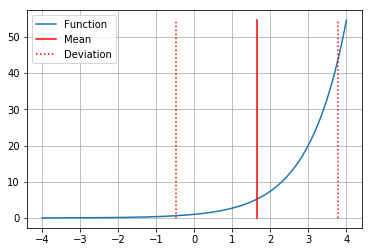

In [2]:
def myfunc(x):
    return  np.exp(x)

def myfunc_σ2(x):
    return (myfunc(x) - μF)**2

X    = st.norm(0, 1)                      # rv_continuous definition, type normal
μF   = X.expect(myfunc,    lb=-6, ub=4)   # expected value of my function
σF2  = X.expect(myfunc_σ2, lb=-6, ub=4)   # variance of my function
σF   = np.sqrt(σF2)

xi   = np.linspace(-4, 4, 200)
fxi  = myfunc(xi)

f01  = plt.figure(1, figsize=(6,4))
f01a = plt.plot(xi, fxi)
f01b = plt.plot([μF,   μF   ],[fxi.min(),fxi.max()], 'r')
f01c = plt.plot([μF-σF,μF-σF],[fxi.min(),fxi.max()], 'r:')
f01d = plt.plot([μF+σF,μF+σF],[fxi.min(),fxi.max()], 'r:')

plt.legend(('Function', 'Mean', 'Deviation'))
plt.grid(True)

print('Expected value of my function is:     {0:5.3}'.format(μF))
print('Standard deviation of my function is: {0:5.3}'.format(σF))

This result can be confirmed by simulation, although some statistical error will be 
present:

In [3]:
xi = myfunc(X.rvs(1000))
μF = xi.mean()
σF = xi.std()

print('Expected value of my function is:     {0:5.3}'.format(μF))
print('Standard deviation of my function is: {0:5.3}'.format(σF))

Expected value of my function is:      1.77
Standard deviation of my function is:  2.62


### 5.3. Linear models of correlated RV vectors  <a name="section_53"></a> 

Como já foi mencionado anteriormente, o teorema do limite central diz que a soma de variáveis aleatórias com distribuição qualquer tende a uma variável gaussiana. Particularmente, a combinação linear de variáveis gaussianas preserva a distribuição gaussiana. Calcula-se a seguir o valor esperado e o desvio padrão desta combinação, já que estes dois parâmetros definem completamente a sua distribuição de probabilidades.

Uma combinação linear de variáveis multivariadas pode ser expressa como:

$$ Y = \sum_{i = 1}^{n}{a_i X_i} $$

Aplicando-se o operador de valor esperado tem-se que:

$$ {\rm E}\left\{Y\right\} = {\rm E}\left\{\sum_{i = 1}^{n}{a_i X_i}\right\} 
                           = \sum_{i = 1}^{n}{a_i {\rm E}\left\{X_i\right\}} $$

Ou seja, como o operador de expectância é linear ele pode avançar para dentro do somatório bem como atravessar constantes multiplicativas. Portanto:

$$ \mu_Y = \sum_{i = 1}^{n}{a_i \mu_i} $$

Da mesma forma, pode-se usar o operador de expectância para o cálculo da variância da combinação:

$$ {\rm E}\left\{\left(Y - \mu_Y\right)^2\right\} = \sigma_Y^2 
 = {\rm E}\left\{\left(\sum_{i = 1}^{n}{a_i X_i} -
                       \sum_{i = 1}^{n}{a_i \mu_i}\right)^2\right\} $$

Fatorando-se as constantes $a_i$ e convertendo-se o quadrado em um duplo 
somatório tem-se que:

$$ \sigma_Y^2 = {\rm E}\left\{ \sum_{i = 1}^{n}\sum_{j = 1}^{n}
                {a_i a_j \left( X_i - \mu_i \right) \left( X_j - \mu_j \right) } \right\} $$

O operador de expectância pode agora avançar para dentro dos somatórios, atravessando as constantes $a_i$ e $a_j$, o que leva a:

$$ \sigma_Y^2 = \sum_{i = 1}^{n}\sum_{j = 1}^{n}{a_i a_j
               {\rm E}\left\{\left(X_i - \mu_i\right) \left(X_j - \mu_j\right)\right\}}  $$

Finalmente, reconhecendo-se que a operação de expectância resultante corresponde à definição de covariância, chega-se a:
	
$$ \sigma_Y^2 = \sum_{i = 1}^{n}\sum_{j = 1}^{n}{\rho_{ij}(a_i\sigma_i)(a_j\sigma_j)} $$
    
Chega-se portanto a expressões simples para o cálculo da média e do desvio padrão
da combinação linear de variáveis correlacionadas. 
Estes resultados _são válidos independentemente da distribuição de probabilidades 
das variáveis combinadas_, mas completam a descrição estatística no caso de 
se combinarem variáveis gaussianas.

Caso se combinem variáveis não correlacionadas, os coeficientes de correlação 
são unitários para $i = j$ e nulos para $i \neq j$, o que resulta na solução particular:

$$ \sigma_Y^2 = \sum_{i = 1}^{n}{a_i^2 \sigma_i^2} $$

Este resultado será usado a seguir para explicar um processo aleatório muito importante na dinâmica de sistemas.


### 5.4. Example: Bernoulli process and random walk  <a name="section_54"></a> 

Pela definição original, um processo de Bernoulli, ${\mathbf B}$, é uma vetor de números aleatórios não correlacionados, que podem assumir os valores 0 ou 1 sempre com as mesmas probabilidades $p$ e $(1-p)$, respectivamente. 
Sem perda de generalidade, assume-se aqui que os dois valores possíveis para o 
processo são $-1$ e $1$, com igual probabilidade $p = (1 - p) = 0.5$, e passamos a 
estudar o que ocorre com um processo que corresponde à soma acumulada dos elementos 
no correspondente vetor de variáveis aleatórias. Portanto, o $k$-ésimo termo deste 
processo, $Y(k)$, é dado por:

$$  Y(k) = \sum_{i = 1}^{k}{B_i} $$

Calculado-se a expectância como uma ponderação pela probabilidade discreta de cada valor possível para uma variável aleatória, o valor médio e o desvio padrão das variáveis (não correlacionadas), $B_i$, podem ser encontrados como:

\begin{align*}
&\mu_B = 0.5 (-1) + 0.5 (+1) = 0 \\
&\sigma_B = \sqrt{0.5 (-1-0)^2 + 0.5 (+1- 0)^2} = 1
\end{align*}

Consequentemente, fazendo-se uso das equações para combinação linear de variáveis 
normais tem-se que:

\begin{align*}
&\mu_Y(k) = \sum_{i = 1}^{k}{0}  = 0 \\
&\sigma_Y(k) = \sqrt{\sum_{i = 1}^{k}{1}} = \sqrt{k}
\end{align*}

Ou seja, o processo $Y(k)$ é um processo com média zero e desvio padrão crescente.

O script abaixo apresenta simulações deste processo, que possui alguns usos e 
interpretações muito úteis. Neste exemplo, ao invés de somar variáveis discretas
vamos generalizar o processo e admitir que as parcelas $B_i$ são variáveis normais, 
não-correlacionadas, com a média zero e desvio padrão unitário.

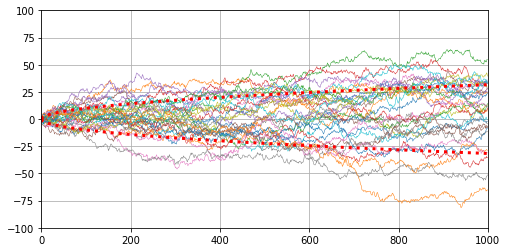

In [4]:
N  = 1000
ni = np.arange(N)
X  = st.norm(0,1)

f03  = plt.figure(3, figsize=(8,4))

plt.axis([0, N, -100, 100])
plt.grid(True)
   
for k in range(32):
    xi = X.rvs(N)
    B  = np.cumsum(xi)
    
    f03a = plt.plot(ni, B, lw=0.5)

f03a = plt.plot(ni,  np.sqrt(ni), 'r:', lw=3)
f03a = plt.plot(ni, -np.sqrt(ni), 'r:', lw=3)

Por exemplo, o ruído captado por um acelerômetro (sensor de vibrações), quando integrado no tempo para produzir um sinal de velocidade (ou duplamente integrado para produzir um deslocamento) resulta em uma _deriva de zero_, devida ao crescimento da variância decorrente da soma acumulada implícita na integração numérica. Consequentemente, este problema de instrumentação requer técnicas especiais de integração para ser evitado.

Um processo de Bernoulli bivariado, quando integrado no tempo, produz um processo aleatório bidimensional chamado random walk. Este processo é utilizado como modelo do movimento Browniano (movimento de partículas minúsculas flutuando na superfície de um líquido, observadas já em 1827 pelo botânico Robert Brown). Esta abordagem probabilística permitiu a Einstein a confirmação da existência de átomos e móleculas, permitindo uma estimativa de seu espaçamento médio. Estas estimativas foram posteriormente confirmadas por Jean Perrin em 1909, rendendo-lhe um Prêmio Nobel.

O script abaixo apresenta simulações do movimento Browniano, também chamado de
_random walk_:

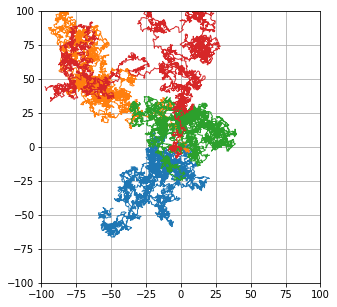

In [5]:
N   = 5000
X   = st.norm(0,1)

f04 = plt.figure(3, figsize=(5,5))

for k in range(4):
    plt.axis([-100, 100, -100, 100])
    plt.grid(True)

    x1 = X.rvs(N);    y1 = np.cumsum(x1)
    x2 = X.rvs(N);    y2 = np.cumsum(x2)

    f04a = plt.plot(y1, y2, lw=1)

### 5.5. Model linearization at mean value  <a name="section_55"></a> 

For nonlinear models, carrying out a model linearization allows an approximate 
evaluation of statistical moments using the same expressions valid for linear 
combination of RV's. Estimation errors are minimized by using the RV's expected 
values as the coordinate where a Taylor series is developed.


### 5.6. Arbitrary models with Monte Carlo analysis  <a name="section_56"></a> 

Monte Carlo analysis is any mathematical technique that uses numerical simulation
of random numbers to solve a given problem.
With the simulation techniques presented so far, we are able to estimate
statistical moments of any arbitrary model that can be programmed as a function.

Simulation techniques always bear some statistical error. In Monte Carlo analysis,
it can be shown that this error is decreased as the number of simulations increases.

Let us recall the cable catenary example from Class 3. 

In [6]:
g   =  9.81                         # local gravity (m/s^2)
S   =  100.                         # total spam (m)
H   =  5000.                        # cable tension at center (N)
A   =  np.pi*(0.0127**2)            # cross section nominal area (m^2)
Es  =  2.05e11                      # Young's modulus for steel (Pa)
ρs  =  7850.                        # density for steel (kg/m^3)

μL  =  ρs*A                         # mass per unit length (kg/m)
EA  =  Es*A                         # axial stiffness

D   =  μL*g*(S**2)/(8*H)            # cable sag (m)
